In [11]:
import os

def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r

In [12]:
from PIL import Image
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt

img_path = './downloads'


def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    r = list_files(img_path)
    for img in r:
        if "DS_Store" not in img:
            try:
                data = np.array(Image.open(img))
                heights.append(data.shape[0])
                widths.append(data.shape[1])
                img_count += 1
            except (IOError, SyntaxError) as e:
                continue
                #print('Bad file:', img) # print out the names of corrupt files
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print('\n')
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))
    print("Total Number of Images: "+ str(img_count))

get_size_statistics()

/Users/directioner0829/anaconda3/lib/python3.6/site-packages/PIL/Image.py:2703: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)




Average Height: 587.7493297587131
Max Height: 860
Min Height: 80


Average Width: 587.7493297587131
Max Width: 860
Min Width: 80
Total Number of Images: 746


In [13]:
labels = [np.array([1,0]), np.array([0, 1])]

def label_img(path, labels):
    if 'chinese'in path: return labels[0]
    elif 'ghanaian' in path: return labels[1]


In [14]:
def show_img(data_set, element):
    print('\n')
    img = data_set[element]
    plt.imshow(img[0], cmap = 'gist_gray')
    if img[1] is not None:
        if img[1][0] == 1:
            print("Chinese")
        else:
            print("Ghanaian")    

In [15]:
import numpy as np
import PIL

IMG_SIZE = 300

def load_data(dir):
    data = []
    r = list_files(dir)
    for img in r:
        try :
            label = label_img(img, labels)
            if "DS_Store" not in img:
                img_data = Image.open(img)
                img_data = img_data.convert('L')
                img_data = img_data.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
                data.append([np.array(img_data), label])
        except (IOError, SyntaxError) as e:
            continue
                #print('Bad file:', img) # print out the names of corrupt files
            
    shuffle(data)
    return data

Number of training images:  605


Chinese


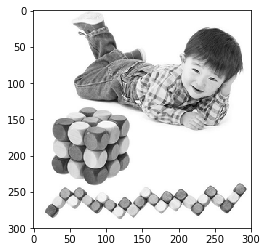

In [16]:
training_dir = "downloads/train"
train_data = load_data(training_dir)
print("Number of training images: ", len(train_data))
show_img(train_data, 13)

Number of testing images:  141


Ghanaian


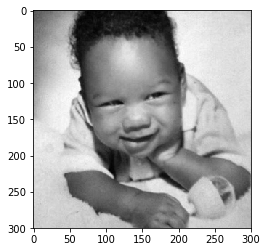

In [18]:
testing_dir = 'downloads/test'
test_data = load_data(testing_dir)
print("Number of testing images: ", len(test_data))
show_img(test_data, 10)

In [19]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

In [20]:
import keras
from keras import models
from keras import layers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE,1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#added classifier
# model.add(layers.Flatten()) 
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))


model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 149, 149, 32)      128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 73, 73, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 96)        55392     
__________

In [21]:
from keras_tqdm import TQDMNotebookCallback

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

model.fit(trainImages, trainLabels, batch_size = 50, epochs = 5, verbose = 0, callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True)])

In [30]:
test_loss, test_acc = model.evaluate(testImages, testLabels)
print(test_acc)

141/141 [==============================] - 47s 334ms/step
0.6950354626838197
